### Latent Variable Models

Consider the <a href="http://yann.lecun.com/exdb/mnist/"> MNIST dataset </a>

<img src="images/mnist_dataset.png"
     alt="The head and torso of a dinosaur skeleton;
          it has a large head with long sharp teeth"
     width="200"
     height="170"
     align="left">

How can we transform a simple distribution into another distribution underlying the digits ? 
How can we say that we have found the distribution which underlies the digits ?

#### Maximum Likelihood Estimation

Given a model and it's parameters, how high is the possibility that the generated instances are sampled from the model. In terms of probability, we can write it as :-

$$ p(S | \theta)$$ where $S$ are the observed samples and $\theta$ are the parameters of the model. For our model to work well, we want to maximize this probability.

$$  \theta_{MLE}  = arg\max_{\substack{\theta}} p(S | \theta)$$

#### p(S) is difficult to compute

Let's load some essential liberaries first

In [13]:
import sys
sys.path.append('lib/mnist/')
from mnist import train_images, train_labels

%load_ext autoreload
%autoreload 2

from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
images = train_images()             # download and import images to temporary directory

In [10]:
mean_image = numpy.mean(images, axis=0)
misc.toimage(mean_image)                        # taking the mean image

Standard set of distributions ie Gaussian distribution is not expressive enough of the whole dataset. There are latent factors available within the dataset which help us in unsupervised learning tasks. This may be the class of the digit or the skewness or rotation of the digit, position of the digit on the canvas. 

#### p(S| S is a 1) is relatively easy to compute

In [11]:
labels = train_labels()

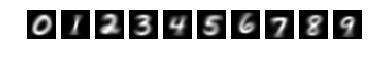

In [20]:
fig = plt.figure()

for i in range(10):
    class_images = images[np.equal(labels,i)]
    mean_image = numpy.mean(class_images, axis=0)
    disp_image = misc.toimage(mean_image)
    
    a = fig.add_subplot(1,10,i+1)
    a.axis('off')
    imgplot = plt.imshow(disp_image, cmap='gray')
plt.show()

If we know the labelled data, the means are fairly recoganizable. This leads to the hypothesis that learning the joint distribution is much easier if we know some "extra information" about it. This information is usually not available to us directly but it is hidden in the dataset. We call it **latent** information stored in a **latent** variable.

$$p(x|\theta) = \int p(z|\theta) \hspace{0.1in} p(x|z,\theta) \hspace{0.1in} dz$$

We know that $p(x|z,\theta)$ is relatively easy to compute from the above example but any latent information is missing. Analytically we have :-

Let $z \in \{0 \cdots 9\}$ indicates the digit. We have $ p(z=k) = P_{k}$ with $P_{k}\geq0$ and $\sum_{k} P_{k} = 1$. 

$p(x|z=k) = \mathcal{N}(x | \mu_{k}\sigma_{k})$. As we need to get the Maximum Likelihood Estimate of $p(x|\theta)$

$$ p(x|\theta) = \int p(z|\theta) \hspace{0.1in} p(x|z,\theta) \hspace{0.1in} dz =  \sum_{k=0}^{9} P_{k} \hspace{0.05in}*\mathcal{N}(x | \mu_{k}\sigma_{k}) $$.

$$ arg\max_{\substack{\theta}}\ln p(x|\theta) = \sum_{n=1}^{N} \ln \sum_{k=0}^{9} P_{k} \hspace{0.05in}*\mathcal{N}(x | \mu_{k}\sigma_{k}) $$

#### Sum over log is difficult to optimize 

### MLE for Gaussian Distribution 

### MLE for mixture of Gaussians

### Expectation Maximization